In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline


In [313]:
df=pd.read_excel("Sample Data 1.xlsx")

In [314]:
df.head(5)

,Employee ID,Last Name,First Name,Customer ID,Order ID,Quantity,Price (SRP),Product ID,Product Name,Order Date,Ship Date,Courier Website,Ship Via,Supplier Name
0,1,Davolio,Nancy,1,1,1,41.90,2201,Triumph Pro Helmet,2015-12-02,2015-12-15,http://www.ups.com,UPS,Triumph
1,3,Leverling,Janet,41,1002,3,1739.85,102181,Mozzie,2015-12-02,2015-12-03,NaN,Pickup,Craze
2,3,Leverling,Janet,41,1002,3,33.90,5205,Xtreme Adult Helmet,2015-12-02,2015-12-03,NaN,Pickup,Craze
3,4,Peacock,Margaret,77,1003,3,53.90,2213,Triumph Vertigo Helmet,2015-12-02,2015-12-14,http://www.ups.com,UPS,Triumph
4,4,Peacock,Margaret,77,1003,3,14.50,5402,Xtreme Anatomic Ladies Saddle,2015-12-02,2015-12-14,http://www.ups.com,UPS,Craze


In [315]:
df.columns

Index(['Employee ID', 'Last Name', 'First Name', 'Customer ID', 'Order ID',
       'Quantity', 'Price (SRP)', 'Product ID', 'Product Name', 'Order Date',
       'Ship Date', 'Courier Website', 'Ship Via', 'Supplier Name'],
      dtype='object')

In [316]:
df.dtypes

Employee ID                 int64
Last Name                  object
First Name                 object
Customer ID                 int64
Order ID                    int64
Quantity                    int64
Price (SRP)               float64
Product ID                  int64
Product Name               object
Order Date         datetime64[ns]
Ship Date          datetime64[ns]
Courier Website            object
Ship Via                   object
Supplier Name              object
dtype: object

In [317]:
Employee_list=df['First Name'].unique()
Employee_list

array(['Nancy', 'Janet', 'Margaret', 'Anne', 'Robert', 'Michael'],
      dtype=object)

In [318]:
Product_list=df['Product Name'].nunique()
Product_list

38

In [319]:
df['Price (SRP)'].describe()

count    3684.000000
mean      544.209023
std       849.386483
min         4.500000
25%        21.900000
50%        53.900000
75%       764.850000
max      2939.850000
Name: Price (SRP), dtype: float64

In [320]:
df[df['Price (SRP)']==2939.85].count()

Employee ID        320
Last Name          320
First Name         320
Customer ID        320
Order ID           320
Quantity           320
Price (SRP)        320
Product ID         320
Product Name       320
Order Date         320
Ship Date          320
Courier Website    268
Ship Via           320
Supplier Name      320
dtype: int64

In [321]:
df[['Courier Website','Ship Via']]

,Courier Website,Ship Via
0,http://www.ups.com,UPS
1,NaN,Pickup
2,NaN,Pickup
3,http://www.ups.com,UPS
4,http://www.ups.com,UPS
...,...,...
3679,http://www.loomis.com,Loomis
3680,NaN,Pickup
3681,http://www.usps.com,Parcel Post
3682,http://www.ups.com,UPS


In [322]:
df[df['Ship Via']=='Pickup'].count()

Employee ID        585
Last Name          585
First Name         585
Customer ID        585
Order ID           585
Quantity           585
Price (SRP)        585
Product ID         585
Product Name       585
Order Date         585
Ship Date          585
Courier Website      0
Ship Via           585
Supplier Name      585
dtype: int64

In [323]:
df['Ship Via Category']=df['Ship Via']

In [324]:
df.columns

Index(['Employee ID', 'Last Name', 'First Name', 'Customer ID', 'Order ID',
       'Quantity', 'Price (SRP)', 'Product ID', 'Product Name', 'Order Date',
       'Ship Date', 'Courier Website', 'Ship Via', 'Supplier Name',
       'Ship Via Category'],
      dtype='object')

In [325]:
df['Ship Via Category'].unique()

array(['UPS', 'Pickup', 'Loomis', 'Purolator', 'Parcel Post', 'FedEx'],
      dtype=object)

In [225]:
df['Ship Via Category'] = df['Ship Via Category'].replace(['UPS', 'Loomis', 'Purolator', 'Parcel Post', 'FedEx'], 'Courier')

<Axes: xlabel='Ship Via Category', ylabel='Quantity'>

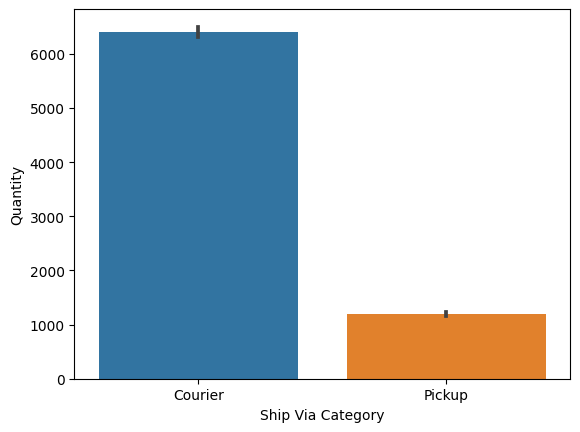

In [228]:
sns.barplot(data=df,x='Ship Via Category',y='Quantity',estimator='sum')

In [328]:
df['Lead Time']=df['Ship Date']-df['Order Date']
df['Lead Time']=df['Lead Time'].dt.days
df['Lead Time'].dtype
df['Lead Time']


0       13
1        1
2        1
3       12
4       12
        ..
3679     6
3680     2
3681     6
3682     6
3683     1
Name: Lead Time, Length: 3684, dtype: int64

<Axes: ylabel='Lead Time'>

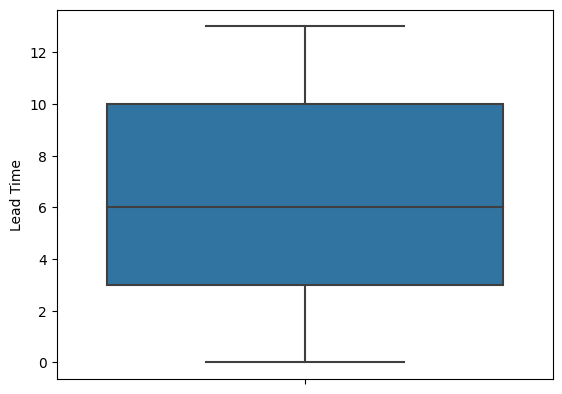

In [329]:
sns.boxplot(data=df,y='Lead Time')

In [330]:
Highlead_time=df.loc[df['Lead Time']>=10]
Highlead_time.head()

,Employee ID,Last Name,First Name,Customer ID,Order ID,Quantity,Price (SRP),Product ID,Product Name,Order Date,Ship Date,Courier Website,Ship Via,Supplier Name,Ship Via Category,Lead Time
0,1,Davolio,Nancy,1,1,1,41.90,2201,Triumph Pro Helmet,2015-12-02,2015-12-15,http://www.ups.com,UPS,Triumph,UPS,13
3,4,Peacock,Margaret,77,1003,3,53.90,2213,Triumph Vertigo Helmet,2015-12-02,2015-12-14,http://www.ups.com,UPS,Triumph,UPS,12
4,4,Peacock,Margaret,77,1003,3,14.50,5402,Xtreme Anatomic Ladies Saddle,2015-12-02,2015-12-14,http://www.ups.com,UPS,Craze,UPS,12
11,4,Peacock,Margaret,11,1008,2,764.85,301161,SlickRock,2015-12-03,2015-12-16,http://www.purolator.com,Purolator,Craze,Purolator,13
12,4,Peacock,Margaret,11,1008,1,479.85,302201,Rapel,2015-12-03,2015-12-16,http://www.purolator.com,Purolator,Craze,Purolator,13


In [331]:
Product_highleadtime=df.loc[df['Lead Time']>=10,'Product Name'].unique()
Product_highleadtime

array(['Triumph Pro Helmet', 'Triumph Vertigo Helmet',
       'Xtreme Anatomic Ladies Saddle', 'SlickRock', 'Rapel', 'Nicros',
       'Xtreme Adult Helmet', 'Mozzie', 'Roadster Micro Mtn Saddle',
       'Descent', 'Active Outdoors Crochet Glove', 'Endorphin',
       'Mini Nicros', 'Xtreme Youth Helmet',
       'Xtreme Gellite  Ladies Saddle', 'Active Outdoors Lycra Glove',
       'Wheeler', 'InFlux Lycra Glove', 'Romeo',
       'Xtreme Anatomic Mens Saddle', 'Xtreme Mtn Lock',
       'Xtreme Rhino Lock', 'Guardian Mini Lock', 'InFlux Crochet Glove',
       'Guardian XL "U" Lock', 'Micro Nicros',
       'Vesper Gelflex ATB Saddle', 'Vesper Comfort ATB Saddle',
       'Xtreme Wide MTB Saddle', 'Guardian "U" Lock',
       'Roadster Mini Mtn Saddle', 'Roadster Jr BMX Saddle',
       'Guardian Chain Lock', 'Xtreme Gellite Mens Saddle',
       'Xtreme Titan Lock', 'Guardian ATB Lock',
       'Vesper Gelflex Ladies Saddle', 'Vesper Comfort Ladies Saddle'],
      dtype=object)

<Axes: title={'center': 'Percentage Sold'}, ylabel='Order ID'>

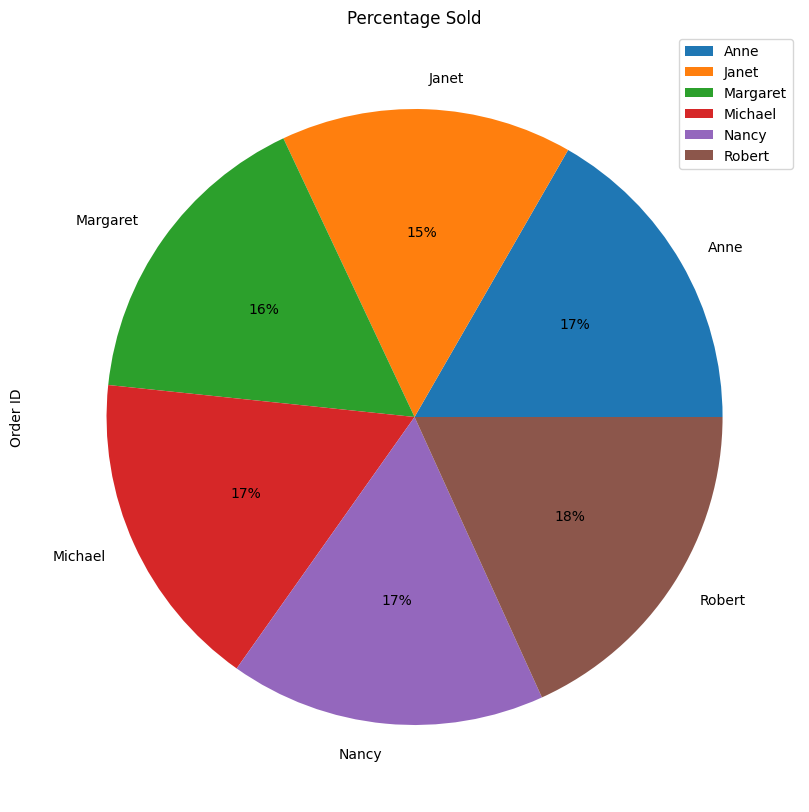

In [279]:
df.groupby('First Name').count().plot(kind='pie', y='Order ID', autopct='%1.0f%%',title='Percentage Sold', figsize=(15,10))